<br>“Employee ID” – Unique ID of the employee.
<br>"department" – the department the employee belongs to.
<br>""promoted" – 1 if the employee was promoted in the previous 24 months, 0 otherwise. "review" – the composite score the employee received in their last evaluation. "projects" – how many projects the employee is involved in.
<br>""salary" – for confidentiality reasons, salary comes in three tiers: low, medium, high. "tenure" – how many years the employee has been at the company.
<br>""satisfaction" – a measure of employee satisfaction from surveys.
<br>""avg_hrs_month" – the average hours the employee worked in a month.
<br>""left" – “yes” if the employee ended up leaving, "no" otherwise.

### Import libraries

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
import sklearn

### Get Data

In [5]:
df = pd.read_csv('dataset.csv')

In [6]:
df.head()

,Employee ID,Departments,Promoted,Review,Projects,Salary,Tenure,Satisfaction,avg_hrs_month,left
0,30018087,sales,0,0.53,2,low,3,0.38,157,1
1,30018088,sales,0,0.86,5,medium,6,0.80,262,1
2,30018089,sales,0,0.88,7,medium,4,0.11,272,1
3,30018090,sales,0,0.87,5,low,5,0.72,223,1
4,30018091,sales,0,0.52,2,low,3,0.37,159,1


### Get Overview

In [7]:
df.describe()

,Employee ID,Promoted,Review,Projects,Tenure,Satisfaction,avg_hrs_month,left
count,1.499900e+04,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,3.002559e+07,0.021268,0.716102,3.803054,3.498233,0.612834,201.050337,0.238083
std,4.329983e+03,0.144281,0.171169,1.232592,1.460136,0.248631,49.943099,0.425924
min,3.001809e+07,0.000000,0.360000,2.000000,2.000000,0.090000,96.000000,0.000000
25%,3.002184e+07,0.000000,0.560000,3.000000,3.000000,0.440000,156.000000,0.000000
50%,3.002559e+07,0.000000,0.720000,4.000000,3.000000,0.640000,200.000000,0.000000
75%,3.002934e+07,0.000000,0.870000,5.000000,4.000000,0.820000,245.000000,0.000000
max,3.003308e+07,1.000000,1.000000,7.000000,10.000000,1.000000,310.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Employee ID    14999 non-null  int64  
 1   Departments    14999 non-null  object 
 2   Promoted       14999 non-null  int64  
 3   Review         14999 non-null  float64
 4   Projects       14999 non-null  int64  
 5   Salary         14999 non-null  object 
 6   Tenure         14999 non-null  int64  
 7   Satisfaction   14999 non-null  float64
 8   avg_hrs_month  14999 non-null  int64  
 9   left           14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [9]:
df.isnull().sum()

Employee ID      0
Departments      0
Promoted         0
Review           0
Projects         0
Salary           0
Tenure           0
Satisfaction     0
avg_hrs_month    0
left             0
dtype: int64

In [10]:

df.columns = df.columns.map(lambda x: x.replace(" ", ""))

In [11]:

df.columns

Index(['EmployeeID', 'Departments', 'Promoted', 'Review', 'Projects', 'Salary',
       'Tenure', 'Satisfaction', 'avg_hrs_month', 'left'],
      dtype='object')

### EDA

#### Create bar plot to see how many emplyees turnover are getting affected by various factors

In [12]:
#create a column for not not leaving: not_left
df['not_left'] = 1- df['left']

In [13]:
# list of all department
df.Departments.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [14]:
# Create a function to plot percnetage of left 
def plot_left_percent(dataframe, grouped_columns ):
    # Create a dataframe with grouped by categorical_column and get sum of all left and not left
    df = dataframe.groupby(grouped_columns).sum()[['left','not_left']]
    #convert percentage of left and not left employee
    df['left_percent'] = np.round(df['left']/(df['left']+df['not_left'])*100)
    # df['not_left_percent'] = np.round(100 - df['left_percent'])
    df = df.sort_values('left_percent')
    df = df.reset_index()
    # Plot the percentage of left employee for grouped column
    fig, ax = plt.subplots(figsize = [10,4])
    g  = ax.bar(x = df[grouped_columns], height = df['left_percent'])
    plt.ylabel('Percentage of Left employee')
    plt.xlabel(grouped_columns)
    plt.title('Percent of Left Employees')
    plt.xticks(df[grouped_columns],rotation = 15) 
    ax.bar_label(g)
    plt.show()
    


In [15]:
# Create a function to plot number of emplyees left or not left 
def plot_Left_NotLeft(dataframe, grouped_columns):
    df_temp = dataframe.groupby(grouped_columns).sum()[['left', 'not_left']]
    df_temp = df_temp.sort_values('left')
    df_temp = df_temp.reset_index()
    fig, ax = plt.subplots(figsize = [10,4])
    p1 = ax.bar(x = df_temp[grouped_columns], height = df_temp['left'], label = 'Left' , color = '#CD5C5C')
    p2 = ax.bar(x = df_temp[grouped_columns], height = df_temp['not_left'],label = 'Not left', bottom = df_temp['left'], color ='#00CED1')
    ax.legend()
    # Label with label_type 'center' instead of the default 'edge'
    ax.bar_label(p1, label_type='center')
    ax.bar_label(p2, label_type='center')
    ax.bar_label(p2)
    plt.ylabel("Number of Emplyee")
    plt.xlabel(grouped_columns)
    plt.xticks(df_temp[grouped_columns],rotation = 15) 
    plt.show()


Department wise Emplyees turnover 

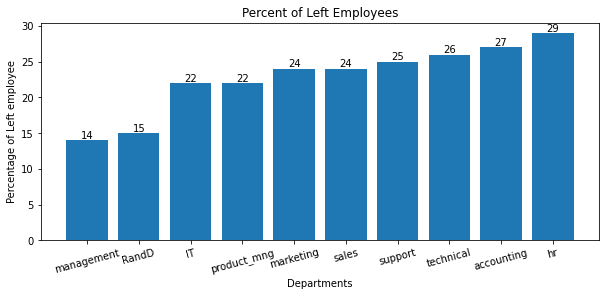

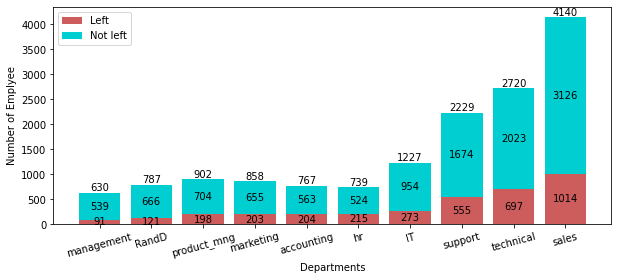

In [16]:
plot_left_percent(df, 'Departments')
plot_Left_NotLeft(df, 'Departments')

mostpeoplefrom "Sales" department are leaving the company but when we compare the leaving percentage department wise, people from "HR" department tend to leave company the most

Salary wise employees turnover

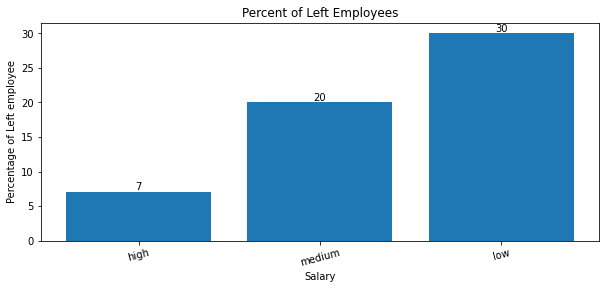

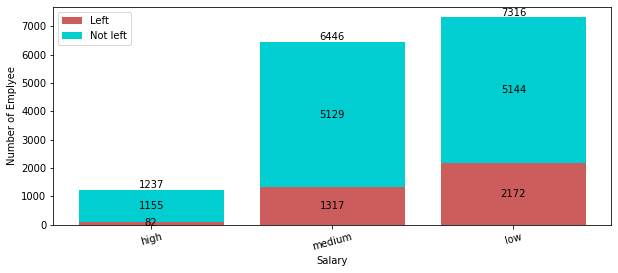

In [17]:
plot_left_percent(df, 'Salary')
plot_Left_NotLeft(df, 'Salary')

30% of emplyees with low salary have left the company and which is 2172 employees out of 7316 employees.

Promoted wise Emplyees turnover

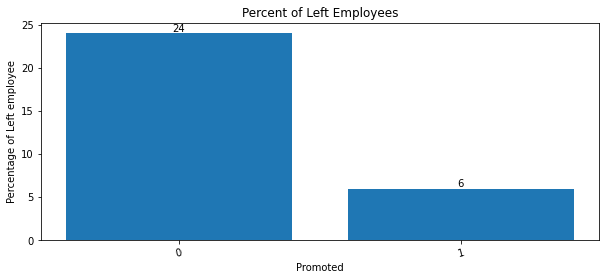

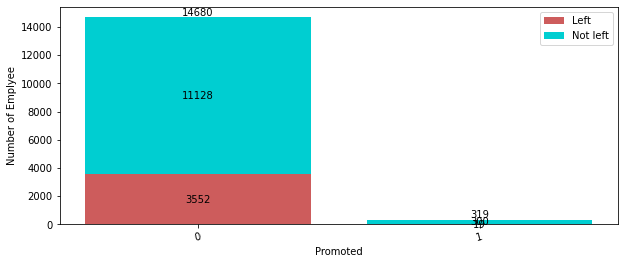

In [18]:
plot_left_percent(df, 'Promoted')
plot_Left_NotLeft(df, 'Promoted')

only 6% of employees amongh  who got promotion left the company while 24% employees have left out of employees who hasn't got got promotion in last 24 year. 

Tenure wise Emplyees turnover

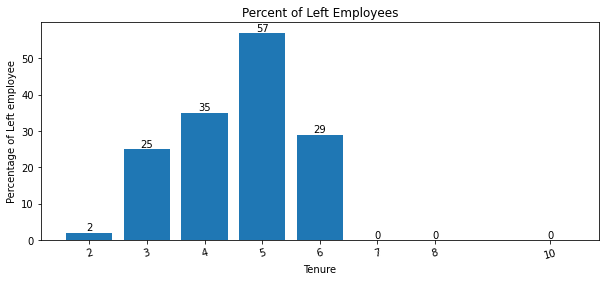

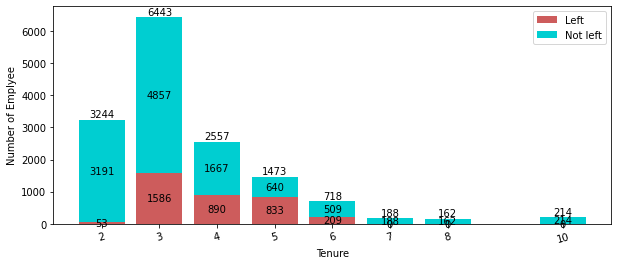

In [19]:
plot_left_percent(df, 'Tenure')
plot_Left_NotLeft(df, 'Tenure')

Most employees with Tenure 5 year have left the company.

Projects wise Emplyees turnover

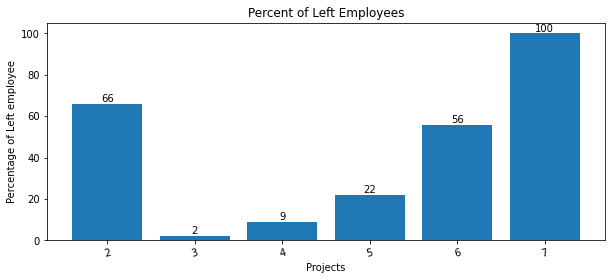

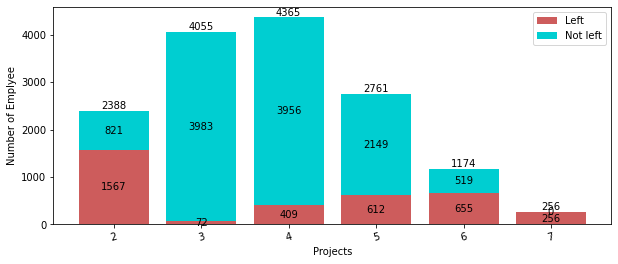

In [20]:
plot_left_percent(df, 'Projects')
plot_Left_NotLeft(df, 'Projects')

100% employees have left the company who has 7 projects. Also most of the epmloyee with 2 projets left the company. 

In [21]:
df.columns

Index(['EmployeeID', 'Departments', 'Promoted', 'Review', 'Projects', 'Salary',
       'Tenure', 'Satisfaction', 'avg_hrs_month', 'left', 'not_left'],
      dtype='object')

How Satisfaction level affects employee turnover

<AxesSubplot:xlabel='left', ylabel='Satisfaction'>

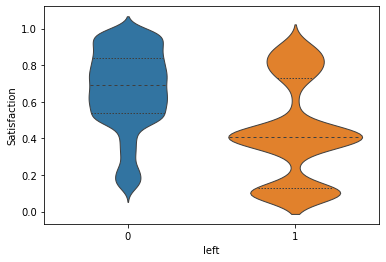

In [22]:
sns.violinplot( x = 'left', y= 'Satisfaction', data = df, inner="quart", linewidth=1,)

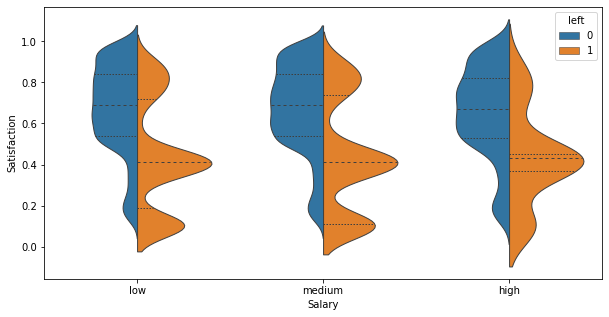

In [23]:
fig, ax = plt.subplots(figsize = [10,5])
ax = sns.violinplot( x = 'Salary', y= 'Satisfaction', hue = 'left', data = df, inner="quart", linewidth=1, split = True)

Most of the employees left have satisfaction level 0.4.

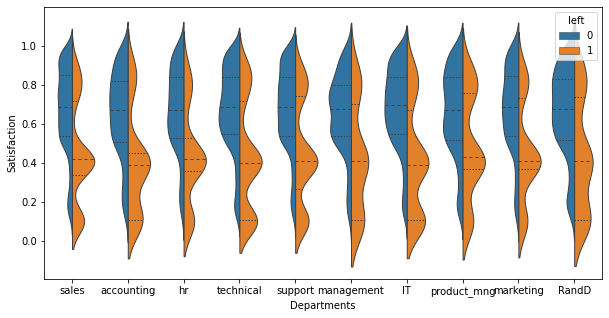

In [24]:
fig, ax = plt.subplots(figsize = [10,5])
ax = sns.violinplot( x = 'Departments', y= 'Satisfaction', hue = 'left', data = df, inner="quart", linewidth=1, split = True)

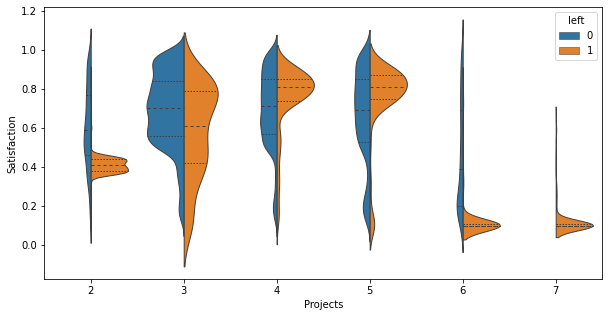

In [25]:
fig, ax = plt.subplots(figsize = [10,5])
ax = sns.violinplot( x = 'Projects', y= 'Satisfaction', hue = 'left', data = df, inner="quart", linewidth=1, split = True)

Employees who had 6 and 7 projects were very less satisfied and most of them left the company.

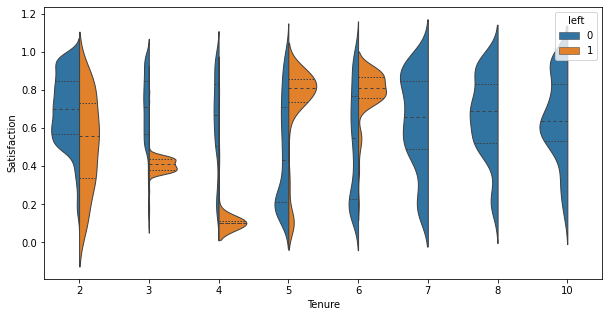

In [26]:
fig, ax = plt.subplots(figsize = [10,5])
ax = sns.violinplot( x = 'Tenure', y= 'Satisfaction', hue = 'left', data = df, inner="quart", linewidth=1, split = True)

Employee who had tenure of 4 year were very less satisfied and who had tenure of 5 and 6 year were satisfied but still left the company.

In [27]:
df

,EmployeeID,Departments,Promoted,Review,Projects,Salary,Tenure,Satisfaction,avg_hrs_month,left,not_left
0,30018087,sales,0,0.53,2,low,3,0.38,157,1,0
1,30018088,sales,0,0.86,5,medium,6,0.80,262,1,0
2,30018089,sales,0,0.88,7,medium,4,0.11,272,1,0
3,30018090,sales,0,0.87,5,low,5,0.72,223,1,0
4,30018091,sales,0,0.52,2,low,3,0.37,159,1,0
...,...,...,...,...,...,...,...,...,...,...,...
14994,30033081,support,0,0.57,2,low,3,0.40,151,1,0
14995,30033082,support,0,0.48,2,low,3,0.37,160,1,0
14996,30033083,support,0,0.53,2,low,3,0.37,143,1,0
14997,30033084,support,0,0.96,6,low,4,0.11,280,1,0


In [28]:
min = []
max = []
mean = []
std = []
median = []
for cls in list(df.Salary.unique()):
    max.append(df[df['Salary']==cls]['Projects'].max())
    min.append(df[df['Salary']==cls]['Projects'].min())
    mean.append(df[df['Salary']==cls]['Projects'].mean())
    median.append(df[df['Salary']==cls]['Projects'].median())
    std.append(df[df['Salary']==cls]['Projects'].std())

In [29]:
df_stats = pd.DataFrame({'Class': list(df.Salary.unique()),
'Min':min,
'Max':max,
'Mean':mean,
'Median':median,
'Standard_Deviation':std})
df_stats

,Class,Min,Max,Mean,Median,Standard_Deviation
0,low,2,7,3.799891,4.0,1.281822
1,medium,2,7,3.813528,4.0,1.201232
2,high,2,7,3.767179,4.0,1.088684


In [30]:
#Create a function to calculate percentile based on columns and variable
def percentile_calculator(dataframe, column, percentiles_list):
    df_percentile = pd.DataFrame({'percentiles' : percentiles_list}) 
    for cls in list(dataframe[column].unique()):
        percentile = np.percentile(dataframe[dataframe[column]== cls].Projects, percentiles_list)
        df_percentile = df_percentile.join(pd.DataFrame({cls:percentile}))
    return df_percentile

percentile_calculator(df,'Salary',[25,50,75,90,100])

,percentiles,low,medium,high
0,25,3.0,3.0,3.0
1,50,4.0,4.0,4.0
2,75,5.0,5.0,5.0
3,90,6.0,5.0,5.0
4,100,7.0,7.0,7.0


In [31]:
df1 = df.groupby(['Salary', 'Projects']).sum().reset_index()
df1['Employyee_Numner'] = df1['left'] + df1['not_left']
df1['left_percent'] = df1['left']/df1['Employyee_Numner']*100
df1

,Salary,Projects,EmployeeID,Promoted,Review,Tenure,Satisfaction,avg_hrs_month,left,not_left,Employyee_Numner,left_percent
0,high,2,4203703161,7,86.42,477,73.27,23632,46,94,140,32.857143
1,high,3,12251044320,25,293.17,1491,280.29,82155,3,405,408,0.735294
2,high,4,11049784902,23,259.51,1341,252.24,74842,2,366,368,0.543478
3,high,5,7356500652,13,177.09,913,155.01,50653,15,230,245,6.122449
4,high,6,2191937054,4,52.51,334,27.43,15084,13,60,73,17.808219
5,high,7,90068817,0,2.55,12,0.31,870,3,0,3,100.000000
6,low,2,40353634018,12,754.71,4223,632.05,213877,966,378,1344,71.875000
7,low,3,53775982519,25,1283.89,5691,1224.83,352457,37,1754,1791,2.065885
8,low,4,62663561555,21,1550.58,7048,1455.31,430039,249,1838,2087,11.931001
9,low,5,39543415582,4,1025.09,5017,907.61,280370,371,946,1317,28.170084


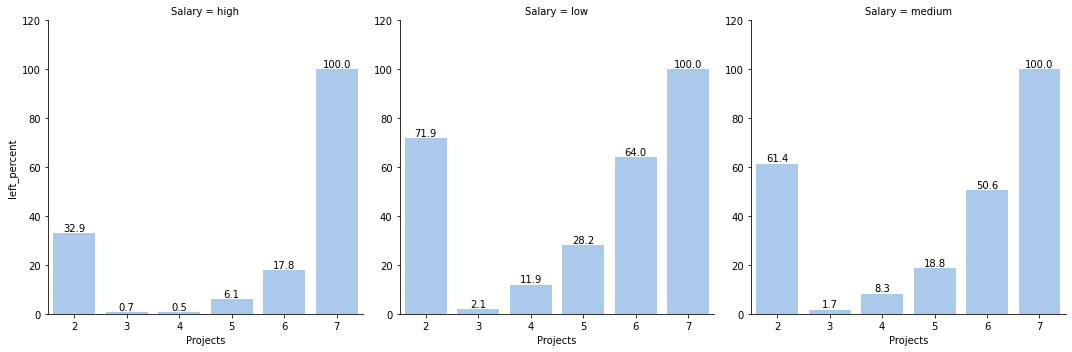

In [32]:
# f, ax = plt.subplots(figsize=(15,4))
sns.set_color_codes("pastel")
ax = sns.catplot(x = 'Projects', y = 'left_percent', data = df1, col = 'Salary', kind  = 'bar', sharey = False, color = 'b')
# sns.catplot(x = 'Projects', y = 'Employyee_Numner', data = df1, col = 'Salary', kind  = 'bar', sharey = False)
for x in ax.axes.ravel():
    # add annotations
    for c in x.containers:
        labels = [f'{(v.get_height()):.1f}' for v in c]
        x.bar_label(c, labels=labels, label_type='edge')
    x.margins(y=0.2)

Employee who had low salary and 6 project, 64% of them left the company while who had only 17.8% of them left the company

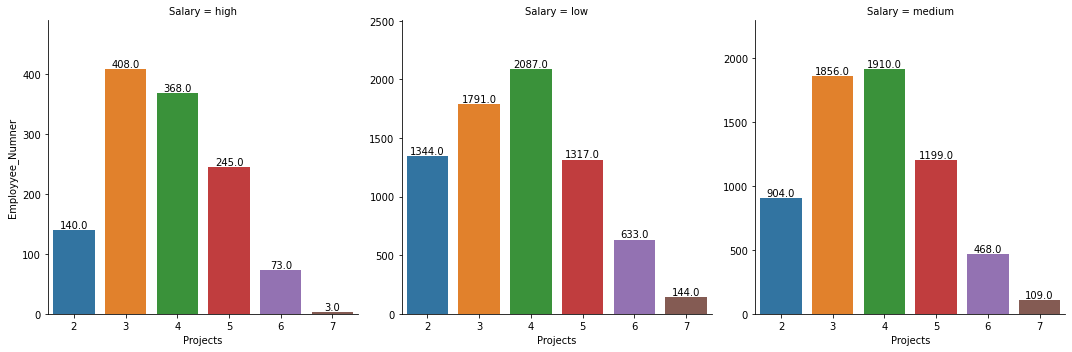

In [33]:
ax1 = sns.catplot(x = 'Projects', y = 'Employyee_Numner', data = df1, col = 'Salary', kind  = 'bar', sharey = False)
for x in ax1.axes.ravel():
    # add annotations
    for c in x.containers:
        labels = [f'{(v.get_height()):.1f}' for v in c]
        x.bar_label(c, labels=labels, label_type='edge')
    x.margins(y=0.2)

---

In [34]:
df1 = df.drop(['EmployeeID','not_left'], axis = 1)

In [35]:
pd.DataFrame(df1.corr()['left'])

,left
Promoted,-0.061788
Review,0.006567
Projects,0.023787
Tenure,0.144822
Satisfaction,-0.388375
avg_hrs_month,0.071287
left,1.000000


<AxesSubplot:>

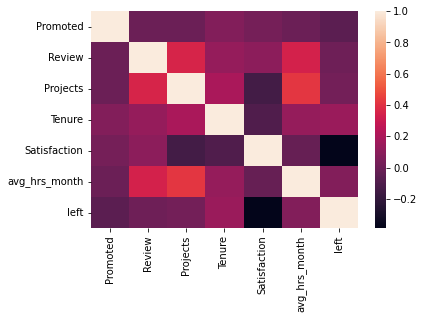

In [36]:
sns.heatmap(data = df1.corr())

We can see major factor for leaving company is there satisfaction level

In [37]:
df_department = pd.get_dummies(df1['Departments'])

In [38]:
df_department

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,0,1,0
14995,0,0,0,0,0,0,0,0,1,0
14996,0,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,0,1,0


In [39]:
df2 = df1.join(df_department)

In [40]:
df2 = df2.drop(['Departments'], axis = 1)

In [41]:
df2

,Promoted,Review,Projects,Salary,Tenure,Satisfaction,avg_hrs_month,left,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0.53,2,low,3,0.38,157,1,0,0,0,0,0,0,0,1,0,0
1,0,0.86,5,medium,6,0.80,262,1,0,0,0,0,0,0,0,1,0,0
2,0,0.88,7,medium,4,0.11,272,1,0,0,0,0,0,0,0,1,0,0
3,0,0.87,5,low,5,0.72,223,1,0,0,0,0,0,0,0,1,0,0
4,0,0.52,2,low,3,0.37,159,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0,0.57,2,low,3,0.40,151,1,0,0,0,0,0,0,0,0,1,0
14995,0,0.48,2,low,3,0.37,160,1,0,0,0,0,0,0,0,0,1,0
14996,0,0.53,2,low,3,0.37,143,1,0,0,0,0,0,0,0,0,1,0
14997,0,0.96,6,low,4,0.11,280,1,0,0,0,0,0,0,0,0,1,0


In [42]:
df_salary = pd.get_dummies(df2['Salary'])

In [43]:
df_salary

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [44]:
df2 = df2.join(df_salary)

In [45]:
df2 = df2.drop('Salary', axis = 1)

In [46]:
df2

,Promoted,Review,Projects,Tenure,Satisfaction,avg_hrs_month,left,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
0,0,0.53,2,3,0.38,157,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0.86,5,6,0.80,262,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0.88,7,4,0.11,272,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0.87,5,5,0.72,223,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0.52,2,3,0.37,159,1,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0,0.57,2,3,0.40,151,1,0,0,0,0,0,0,0,0,1,0,0,1,0
14995,0,0.48,2,3,0.37,160,1,0,0,0,0,0,0,0,0,1,0,0,1,0
14996,0,0.53,2,3,0.37,143,1,0,0,0,0,0,0,0,0,1,0,0,1,0
14997,0,0.96,6,4,0.11,280,1,0,0,0,0,0,0,0,0,1,0,0,1,0


In [47]:
df2

,Promoted,Review,Projects,Tenure,Satisfaction,avg_hrs_month,left,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
0,0,0.53,2,3,0.38,157,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0.86,5,6,0.80,262,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0.88,7,4,0.11,272,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0.87,5,5,0.72,223,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0.52,2,3,0.37,159,1,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0,0.57,2,3,0.40,151,1,0,0,0,0,0,0,0,0,1,0,0,1,0
14995,0,0.48,2,3,0.37,160,1,0,0,0,0,0,0,0,0,1,0,0,1,0
14996,0,0.53,2,3,0.37,143,1,0,0,0,0,0,0,0,0,1,0,0,1,0
14997,0,0.96,6,4,0.11,280,1,0,0,0,0,0,0,0,0,1,0,0,1,0


In [52]:
X = df2.drop('left', axis = 1)

In [53]:
y = df2['left']

In [78]:
X.columns

Index(['Promoted', 'Review', 'Projects', 'Tenure', 'Satisfaction',
       'avg_hrs_month', 'IT', 'RandD', 'accounting', 'hr', 'management',
       'marketing', 'product_mng', 'sales', 'support', 'technical', 'high',
       'low', 'medium'],
      dtype='object')

---

In [57]:
selector = SelectKBest(sklearn.feature_selection.f_classif, k=1)
selected_data = selector.fit_transform(X, y)
selected_data

array([[0.38],
       [0.8 ],
       [0.11],
       ...,
       [0.37],
       [0.11],
       [0.37]])

In [58]:
selected_features = pd.DataFrame(selector.inverse_transform(selected_data), 
                                 index=df.index, 
                                 columns=X.columns)

selected_columns = selected_features.columns[selected_features.var() != 0]
selected_features[selected_columns].head()

,Satisfaction
0,0.38
1,0.80
2,0.11
3,0.72
4,0.37


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [60]:
X_train

,Promoted,Review,Projects,Tenure,Satisfaction,avg_hrs_month,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
11819,0,0.61,4,2,0.61,246,0,0,1,0,0,0,0,0,0,0,0,1,0
3194,0,0.65,5,2,0.57,177,1,0,0,0,0,0,0,0,0,0,1,0,0
5413,0,0.78,2,2,0.53,138,0,1,0,0,0,0,0,0,0,0,0,1,0
4453,0,0.86,6,5,0.41,215,0,0,0,0,0,0,0,1,0,0,0,1,0
13260,0,0.83,4,2,0.65,251,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14592,0,0.46,2,3,0.38,145,0,0,0,1,0,0,0,0,0,0,0,0,1
9509,0,0.91,5,3,0.77,274,0,0,0,0,0,0,0,0,0,1,0,1,0
7036,0,0.82,4,2,0.97,176,0,0,0,0,0,0,0,1,0,0,0,1,0
6284,0,0.67,4,3,0.63,149,0,0,0,0,0,0,0,1,0,0,0,0,1


---

### Predictive Model

In [61]:
X_test

,Promoted,Review,Projects,Tenure,Satisfaction,avg_hrs_month,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
9154,0,0.83,5,3,0.68,267,0,1,0,0,0,0,0,0,0,0,0,0,1
12797,0,0.93,4,3,0.90,263,0,0,0,0,0,0,0,0,1,0,0,0,1
9728,0,0.94,4,5,0.13,213,0,0,0,1,0,0,0,0,0,0,0,1,0
3176,0,0.68,4,2,0.56,220,0,0,0,0,0,0,0,0,1,0,0,0,1
576,0,0.78,2,2,0.48,198,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5686,0,0.67,3,2,0.99,200,0,0,0,0,0,0,0,0,0,1,0,1,0
2248,0,0.75,4,2,0.53,239,0,0,0,0,0,0,0,0,0,1,0,0,1
11683,0,0.60,3,10,0.96,160,0,0,0,0,0,0,0,0,1,0,0,0,1
13946,0,0.77,5,3,0.89,232,0,0,0,0,0,0,0,1,0,0,0,1,0


In [62]:
y_train

11819    0
3194     0
5413     0
4453     0
13260    0
        ..
14592    1
9509     0
7036     0
6284     0
8408     0
Name: left, Length: 11999, dtype: int64

In [63]:
y_test

9154     0
12797    0
9728     0
3176     0
576      1
        ..
5686     0
2248     0
11683    0
13946    0
10951    0
Name: left, Length: 3000, dtype: int64

In [64]:
from sklearn.linear_model import LogisticRegression

In [68]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(max_iter = 500)

In [69]:
logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [71]:
y_hat = logisticRegr.predict(X_test)
y_hat

array([0, 0, 1, ..., 0, 0, 0])

In [72]:
logisticRegr.predict_proba(X_test)

array([[0.92861393, 0.07138607],
       [0.9317359 , 0.0682641 ],
       [0.1539635 , 0.8460365 ],
       ...,
       [0.81502888, 0.18497112],
       [0.92919371, 0.07080629],
       [0.94710313, 0.05289687]])

In [73]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.7686666666666667


In [75]:
from sklearn import metrics

In [77]:
cm = metrics.confusion_matrix(y_test, y_hat)
print(cm)

[[2108  171]
 [ 523  198]]


In [79]:
logisticRegr.predict(X)

array([1, 0, 1, ..., 0, 1, 1])

In [80]:
logisticRegr.score(X,y)

0.7725181678778585

---

Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
clf=RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [84]:
preds = clf.predict(X_test)

In [85]:
preds

array([0, 0, 0, ..., 0, 0, 0])

In [88]:
print(clf.score(X_train, y_train))
print("Score on test data", clf.score(X_test, y_test))

1.0
Score on test data 0.99


We have 99% accuracy with the help of random forest

In [90]:
cm = metrics.confusion_matrix(y_test, y_hat)
print(cm)

[[2108  171]
 [ 523  198]]


---